# PENGENALAN WAJAH DENGAN LOCAL BINARY PATTERNS (FACE DETECTION WITH LBP)


OpenCV memiliki tiga pengenal wajah bawaan dan berkat pengkodean bersih OpenCV, kita dapat menggunakan salah satunya hanya dengan mengubah satu baris kode. Nama-nama pengenal wajah tersebut dan panggilan OpenCV .
- Pengenal Pengenal Wajah EigenFaces - cv2.face.createEigenFaceRecognizer()
- Pengenal Pengenal Wajah FisherFaces - cv2.face.createFisherFaceRecognizer()
- Pengenal Wajah Histogram Local Binary Patterns (LBPH) - cv2.face.createLBPHFaceRecognizer()

Algoritma LBPH menggunakan deskriptor citra lokal yang disebut Linear Binary Pattern (LBP). LBP menggambarkan informasi kontras suatu piksel sehubungan dengan piksel tetangganya. Proses dilakukan dengan bagaimana menggabungkan informasi spasial dalam model pengenalan wajah dengan membagi gambar LBP menjadi m daerah lokal dan mengekstrak histogram dari masing-masing. Vektor fitur yang ditingkatkan secara spasial kemudian diperoleh dengan menggabungkan histogram lokal (bukan menggabungkannya). Histogram ini disebut Histogram Local Binary Patterns.



 Langkah dalam pengenalan wajah LBP:
- Langkah 1 : Citra wajah dibagi menjadi daerah-daerah lokal (blok). {R0, R1, …, Rm-1} (lokalitas tingkat piksel)
- Langkah 2: Ekstrak histogram LBP untuk setiap wilayah. (lokal tingkat regional)
- Langkah 3 : Menggabungkan semua histogram menjadi histogram yang disempurnakan secara spasial dengan panjang m x n (n adalah panjang histogram LBP tunggal). (lokalitas tingkat global)

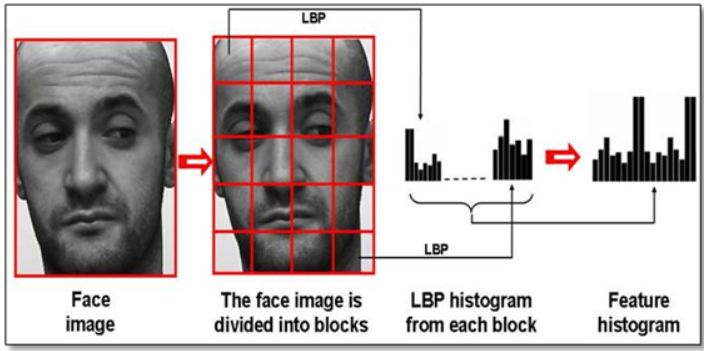

### model = cv2.face.LBPHFaceRecognizer_create()

# Import libraries

In [20]:
import cv2
# import os untuk membaca data training directory dan path-nya
import os
import numpy as np
import matplotlib.pyplot as plt

# Deteksi Wajah 
pengujian terhadap file gambar yang akan di training

In [21]:
# aktifkan path directori data untuk training dan testing
training_data_folder_path = 'data1/training-data'
test_data_folder_path = 'data1/test-data'

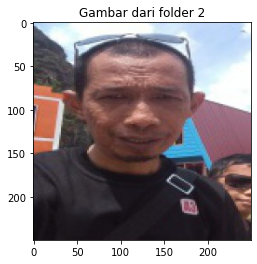

In [22]:
baca_gambar = cv2.imread('data1/training-data/1/saya1.jpg')
gambar=cv2.cvtColor(baca_gambar,cv2.COLOR_BGR2RGB)
plt.title('Gambar dari folder 2')
plt.imshow(gambar)

In [23]:
# load LBP opencv 
lbpcascade_frontalface = 'lbpcascades/lbpcascade_frontalface.xml'

In [24]:
# fungsi deteksi wajah pada opencv
def detek_wajah(input_gbr):
    # konversi gambar ke kabuan
    gbr = cv2.cvtColor(input_gbr, cv2.COLOR_BGR2GRAY)
    
    # klasifikasi cascade
    cascade_wajah = cv2.CascadeClassifier(lbpcascade_frontalface)
    
    # deteksi dengan multiscale 
    wajah = cascade_wajah.detectMultiScale(gbr, scaleFactor=1.2, minNeighbors=5);
    
    #jika tidak ada wajah terdeteksi kembali ke gambar yang asli
    if (len(wajah) == 0):
        return None, None
    
    # ekstrak area wajah
    (x, y, w, h) = wajah[0]
    # kembalikan hanya bagian wajah dari gambar
    return gbr[y:y+w, x:x+h], wajah[0]

# Persiapan training data

In [25]:
# fungsi ini akan membaca gambar pelatihan semua orang, mendeteksi wajah dari setiap gambar
def prepare_training_data(training_data_folder_path):
    # daftar untuk menampung semua wajah 
    deteksi_wajah = []
    #list untuk menyimpan semua label 
    label_wajah = []
    
    # dapatkan nama gambar yang ada di dalam direktori 
    gbr_training = os.listdir(training_data_folder_path)
    
    # tenelusuri setiap direktori dan membaca gambar di dalamnya
    for nama_dir in gbr_training:
        
        # ekstrak label number dari nama_dir
        label = int(nama_dir)
        
        # build path direktori yang berisi gambar untuk subjek saat ini 
        training_gambar_path = training_data_folder_path + "/" + nama_dir
       
        # dapatkan nama gambar yang ada di dalam direktori subjek yang diberikan
        training_nama_gambar = os.listdir(training_gambar_path)
        
        # menelusuri setiap nama gambar, membaca gambar,
        # deteksi wajah dan tambahkan wajah ke daftar wajah
        for nama_gambar in training_nama_gambar:
            
            # membangun jalur gambar
            # contoh jalur gambar = training-data/s1/1.pgm
            path_gambar = training_gambar_path  + "/" + nama_gambar
            
            # baca gambar
            gbr = cv2.imread(path_gambar)
            
            # deteksi wajah
            wajah_pilih, persegi = detek_wajah(gbr)
            
            # hindari wajah terdeteksi
            if wajah_pilih is not None:
                
                # tambahkan gambar wajah ke list wajah
                deteksi_wajah.append(wajah_pilih)
                
                # tambahkan label gambar wajah
                label_wajah.append(label)
    # Kembali
    return deteksi_wajah, label_wajah

In [26]:
# siapkan data pelatihan
# data akan berada dalam dua daftar dengan ukuran yang sama
# satu daftar akan berisi semua wajah
# dan daftar lainnya akan berisi label masing-masing untuk setiap wajah
deteksi_wajah, label_wajah = prepare_training_data("data1/training-data")

In [27]:
# print total label dan wajah
print("Total wajah: ", len(deteksi_wajah))
print("Total label: ", len(label_wajah))

Total wajah:  51
Total label:  51


In [28]:
# buat pengenal wajah LBPH
lbphfaces_recognizer=cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=2)

# Inisiasi Pengenalan Wajah

In [29]:
# latih pengenalan wajah  dari wajah latihan 
lbphfaces_recognizer.train(deteksi_wajah, np.array(label_wajah))

# Pelatihan model pengenalan wajah

In [30]:
# fungsi menggambar persegi  pada gambar
# sesuai dengan koordinat (x, y) yang diberikan dan diberikan lebar dan tinggi
def gambar_persegi(test_gambar, persegi):
    (x, y, w, h) = persegi
    cv2.rectangle(test_gambar, (x, y), (x+w, y+h), (0, 255, 255), 2)

# fungsi untuk menggambar teks pada memberikan gambar mulai dari #melewati (x, y) koordinat.
def gambar_text(test_gambar, label_text, x, y):
    cv2.putText(test_gambar, label_text, (x, y), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 2)

# Prediksi hasil dengan menggunakan test data

In [31]:
# fungsi untuk prediksi
def predict(test_gambar):
        # wajah input sama dengan wajah di data-training
    wajah_pilih, persegi = detek_wajah(test_gambar)
    # nama wajah yang sesuai katagori
    label= lbphfaces_recognizer.predict(wajah_pilih)
    # nama teks yang sesuai dengan label
    label_text = tags[label[0]]
    # membuat persegi dan teks di sekitar wajah
    gambar_persegi(test_gambar, persegi)
    gambar_text(test_gambar, label_text, persegi[0], persegi[1]-5)
    return test_gambar, label_text

In [32]:
tags = ['Luhut', 'Saya', 'Susi Pujiastuti','Prabowo']
test_gambar = cv2.imread("data/susi17.jpg")
prediksi_gambar, label = predict(test_gambar)

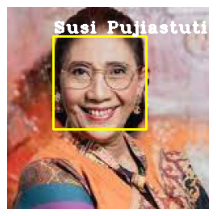

In [33]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
plt.axis("off")
imgplot = plt.imshow(cv2.cvtColor(prediksi_gambar, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
cv2.imshow(label,prediksi_gambar)
cv2.waitKey()
cv2.destroyAllWindows()